## Book Recommendation System

Sumitted By- Mayank Deopa

In [1]:
 from IPython.display import Image
Image(url= "https://images.pexels.com/photos/207662/pexels-photo-207662.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500", width=400, height=400)
## importing image in notebook

In [2]:
## Importing All Necessary Library
import pandas as pd
import numpy as np
## for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
## for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual
## For Ignoring Warning ErrorMessage
from warnings import filterwarnings
filterwarnings('ignore')


 ## Importing Dataset


In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/MayankDeopa/Data-Science-Projects/main/booker.csv", error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [4]:
df.head()
## Checking Top 5 Row


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


## Dataset Description


* bookID: Unique identification number fro each book
* title: Name under which book was published
* authors: Name of the Authors of the book
* average_rating: Avarage rating of the book recevied in total.
* isbn: International standarded book number
* isbn13: 13 digit isbn to identify the book
* language_code: Primary Language of the book
* num_pages: Number of pages the book containes
* ratings_count: Total Number of ratings the book recevied.
* text_reviews_count: Total number of written reviews recevied.
* publication_date: Date when the book was first published
* publisher: Name of the Pulishers

## Checking Row & Column Of Dataset

In [5]:
df.shape

(11123, 12)

## Checking All Columns Of the dataset


In [6]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

## Removing Extra Spaces from All Column name

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

## Checking DataTypes of All Columns

In [9]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

## Checking Statistical Summary of all Numeric Columns

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bookID,11123.0,2.131086e+04,1.309473e+04,1.000000e+00,1.027750e+04,2.028700e+04,3.210450e+04,4.564100e+04
average_rating,11123.0,3.934075e+00,3.504853e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.140000e+00,5.000000e+00
isbn13,11123.0,9.759880e+12,4.429758e+11,8.987060e+09,9.780345e+12,9.780582e+12,9.780872e+12,9.790008e+12
num_pages,11123.0,3.364056e+02,2.411526e+02,0.000000e+00,1.920000e+02,2.990000e+02,4.160000e+02,6.576000e+03
ratings_count,11123.0,1.794285e+04,1.124992e+05,0.000000e+00,1.040000e+02,7.450000e+02,5.000500e+03,4.597666e+06
text_reviews_count,11123.0,5.420481e+02,2.576620e+03,0.000000e+00,9.000000e+00,4.700000e+01,2.380000e+02,9.426500e+04


## Checking Statistical Summary of all Categorical Columns



In [11]:
df.describe(include = 'object')

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Iliad,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


## Checking Sum of all Null value Present in the Dataset.


In [12]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

## Checking if any Duplicate Row Present In Dataset or Not.


In [13]:
df.duplicated().any()

False

## Checking Summary of Dataset


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


## Checking All Unique Rows Present in isbn Columns


In [15]:
df.isbn.nunique()

11123

## Droping Unnecessary Column present in Dataset.


In [16]:
df.drop(['bookID', 'isbn', 'isbn13'], axis = 1, inplace = True)

## Creating New Year Columns

In [17]:
df['year'] = df['publication_date'].str.split('/')
df['year'] = df['year'].apply(lambda x: x[2])

In [18]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic,2004


## Checking Datatypes for all Column name

In [19]:
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                   object
dtype: object

## Changing datatype of year to Int

In [20]:
df['year'] = df['year'].astype('int')

In [21]:
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                    int32
dtype: object

## Checking Minimum Year Present in a Dataset.

In [22]:
df['year'].min()

1900

## Filter Year == 2022 and get required output based on input.

In [23]:
df[df['year'] == 2020][['title', 'authors','average_rating','language_code','publisher' ]]

,title,authors,average_rating,language_code,publisher
9664,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,eng,Avon


## Creating Groupby function based on Year and Title column

In [24]:
df.groupby(['year'])['title'].agg('count').sort_values(ascending = False).head(20)


year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

## Ploting Counplot graph for "Top 10 Authors with Maximum book Publish"

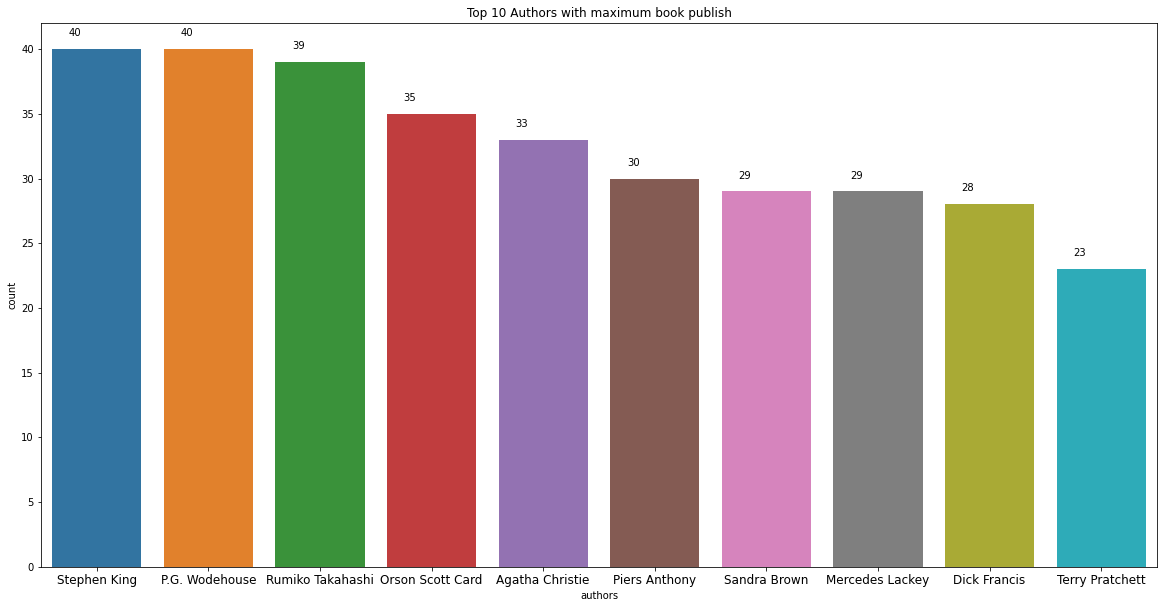

In [25]:
plt.figure(figsize = (20, 10))
ax = sns.countplot(x = 'authors', data = df,
 order = df['authors'].value_counts().iloc[:10].index)
plt.title("Top 10 Authors with maximum book publish")
plt.xticks(fontsize = 12)
for p in ax.patches:
 ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()


## Sort All Value Count of language_code.

In [26]:
 df.language_code.value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

## Creating Groupby Function base on language_code Column and getting Required Output.


In [27]:
df.groupby(['language_code'])[['average_rating', 
 'ratings_count', 
'text_reviews_count']].agg('mean').style.background_gradient(cmap = 'Wistia')


,average_rating,ratings_count,text_reviews_count
language_code,,,
ale,4.360000,102.000000,16.000000
ara,3.550000,122.000000,12.000000
en-CA,4.025714,4086.714286,324.428571
en-GB,3.923411,2463.691589,104.060748
en-US,3.914659,3773.906960,160.357244
eng,3.934062,21570.272564,645.156601
enm,3.873333,3233.666667,84.000000
fre,3.971528,3277.319444,64.513889
ger,3.950101,234.727273,8.232323


## Ploting Distribution Graph on Average_Rating.


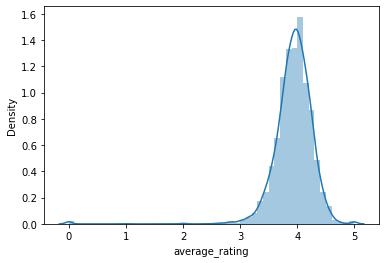

In [28]:
### Ploting Distribution Graph on Average_Rating.
sns.distplot(df['average_rating'])
plt.show()


## Checking Top 20 Publisher in Dataset

In [29]:
publisher = df['publisher'].value_counts()[:20]
publisher

Vintage                         318
Penguin Books                   261
Penguin Classics                184
Mariner Books                   150
Ballantine Books                144
Harper Perennial                112
HarperCollins                   112
Pocket Books                    111
Bantam                          110
VIZ Media LLC                    88
Berkley                          86
Dover Publications               85
Modern Library                   82
Del Rey                          80
Tor Books                        76
Grand Central Publishing         76
Oxford University Press  USA     75
Oxford University Press          73
Scribner                         73
W. W. Norton  Company            68
Name: publisher, dtype: int64

## Plotting Barplot for Top 20 Publishers


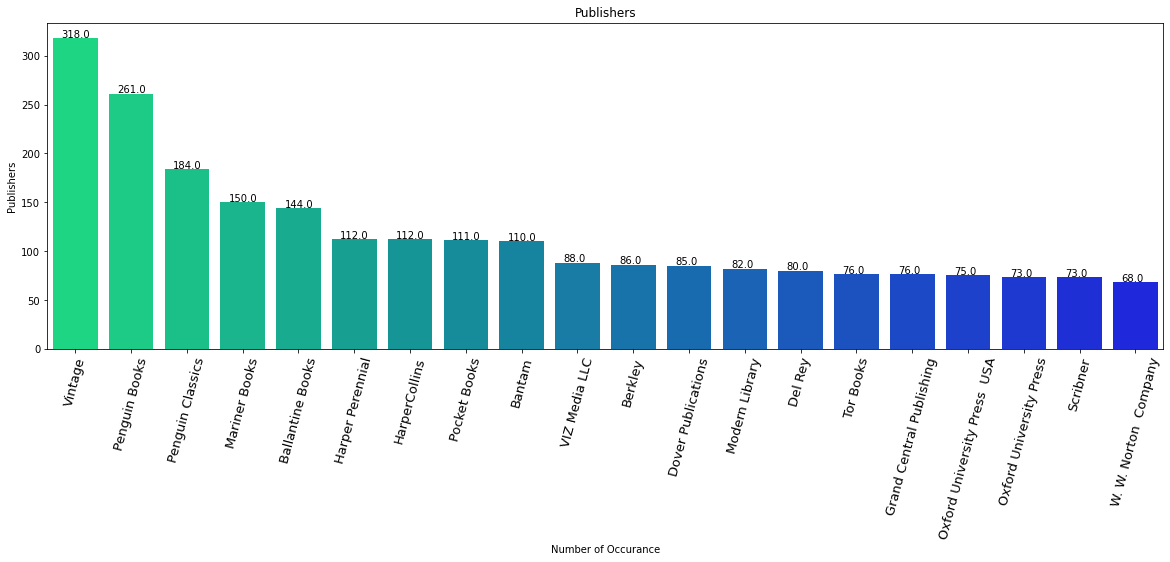

In [30]:
## Plotting Barplot for Top 20 Publishers
plt.figure(figsize = (20, 6))
publisher = df['publisher'].value_counts()[:20]
ax = sns.barplot(x = publisher.index, y = publisher, palette = 'winter_r')
plt.title("Publishers")
plt.xlabel("Number of Occurance")
plt.ylabel("Publishers")
plt.xticks(rotation = 75, fontsize = 13)
for p in ax.patches:
 ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()


 ## Now Book Recommendation System Implementation


* Recommending Books based on Publishers
* Recommending Books based on Authors
* Recommending Books based on Language

## Recommending Books based on Publishers

In [31]:
def recomd_books_publisheres(x):
 a = df[df['publisher'] == x][['title', 'average_rating']]
 a = a.sort_values(by = 'average_rating', ascending = False)
 return a.head(10)


In [32]:
### Checking Function of Recommending Books based on Publishers name "Vintage"
recomd_books_publisheres('Vintage')


,title,average_rating
7371,Remembrance of Things Past: Volume II - The Gu...,4.53
335,The Power Broker: Robert Moses and the Fall of...,4.51
10838,The Civil War Vol. 1: Fort Sumter to Perryville,4.42
1775,The Son Avenger (The Master of Hestviken #4),4.40
1505,A Fine Balance,4.36
9626,Nobody Knows My Name,4.35
2267,The Stories of Vladimir Nabokov,4.30
3112,All of Us: The Collected Poems,4.30
8787,Selected Stories,4.28
4019,Selected Stories,4.28


## Recommending Books based on Authors


In [33]:
### Creating Interactive Plotting using ipywidgets for Recommending Books based on Authors
@interact
def recomd_books_authors(authors_name = list(df['authors'].value_counts().index)):
 a = df[df['authors'] == authors_name][['title', 'average_rating']]
 a = a.sort_values(by = 'average_rating', ascending = False)
 return a.head(10)

interactive(children=(Dropdown(description='authors_name', options=('Stephen King', 'P.G. Wodehouse', 'Rumiko …

## Recommending Books based on Language


In [34]:
### Creating Interactive Plotting using ipywidgets for Recommending Books based on Language
@interact
def recomd_books_lang(language = list(df['language_code'].value_counts().index)):
 a = df[df['language_code'] == language][['title', 'average_rating']]
 a = a.sort_values(by = 'average_rating', ascending = False)
 return a.head(10)

interactive(children=(Dropdown(description='language', options=('eng', 'en-US', 'spa', 'en-GB', 'fre', 'ger', …

## Data Preprocessing

In [35]:
### Checking Top 2 Rows
df.head(2)


,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004


## Creating Function for Converting Number to Object on Average_Rating Column.


In [36]:
### Creating Function for Converting Number to Object on Average_Rating Column.
def num_to_obj(x):
 if x >0 and x <=1:
   return "between 0 and 1"
 if x > 1 and x <= 2:
   return "between 1 and 2"
 if x > 2 and x <=3:
   return "between 2 and 3"
 if x >3 and x<=4:
   return "between 3 and 4"
 if x >4 and x<=5:
   return "between 4 and 5"
df['rating_obj'] = df['average_rating'].apply(num_to_obj)

In [37]:
### Now Checking Total Value for each Converted Objects.
df['rating_obj'].value_counts()


between 3 and 4    6285
between 4 and 5    4735
between 2 and 3      69
between 1 and 2       7
between 0 and 1       2
Name: rating_obj, dtype: int64

In [38]:
## Creating One-Hot Encoding on Rating columns
rating_df = pd.get_dummies(df['rating_obj'])
rating_df.head()


,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [39]:
df.columns


Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year', 'rating_obj'],
      dtype='object')

In [40]:
## Creating One-Hot Encoding on language_code columns
language_df = pd.get_dummies(df['language_code'])
language_df.head()


,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
### Performing Concatenation Function for Joining two Dataframe
features = pd.concat([rating_df,language_df, df['average_rating'],
 df['ratings_count'], df['title']], axis = 1)
features.set_index('title', inplace= True)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
title,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
Harry Potter and the Order of the Phoenix (Harry Potter #5),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
Harry Potter and the Chamber of Secrets (Harry Potter #2),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


## Feature Scaling


In [42]:
### Importing MinMax SCaler on dataset
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [44]:
features_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

## Model Building


In [45]:
### IMporting Neighbors Library.
from sklearn import neighbors


In [46]:
### Model Fitting
model = neighbors.NearestNeighbors(n_neighbors=5, algorithm = 'ball_tree',
 metric = 'euclidean')
model.fit(features_scaled)
dist, idlist = model.kneighbors(features_scaled)

In [47]:
df['title'].value_counts()


The Iliad                                               9
The Brothers Karamazov                                  9
The Odyssey                                             8
Anna Karenina                                           8
'Salem's Lot                                            8
                                                       ..
The Noonday Demon: An Atlas of Depression               1
The Noonday Demon: An Anatomy of Depression             1
My Secret: A PostSecret Book                            1
The Secret Lives of Men and Women: A PostSecret Book    1
Las aventuras de Tom Sawyer                             1
Name: title, Length: 10348, dtype: int64

In [48]:
### Creating Book Recommendation System while using Book Title through Interactive Plotting Library.
@interact
def BookRecomender(book_name = list(df['title'].value_counts().index)):
    book_list_name = []
    book_id = df[df['title'] == book_name]
    book_id = book_id.index[0]
    for newid in idlist[book_id]:
        book_list_name.append(df.iloc[newid].title)

    return book_list_name    

interactive(children=(Dropdown(description='book_name', options=('The Iliad', 'The Brothers Karamazov', 'The O…

## Thank You